# MTH8999 : Analyse des valeurs extrêmes en environnement

Jonathan Jalbert<br/>
Professeur agrégé au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


# TD 1 - Rappel de probabilités

Ce TD constitue une introduction au langage Julia et au calepin Jupyter. Il a pour but d'introduire les commandes de base de Julia ainsi que les fonctionnalités des librairies qui seront utilse dans le cours.

Commençons par charger les librairies nécessaires. Si elles ne sont pas installées, vous pouvez le faire avec les commandes suivantes :

```
using Pkg
Pkg.add(["CSV", "DataFrames" ,"Distributions", "Gadfly"])
```

In [1]:
using CSV              # Pour charger les fichiers CSV
using DataFrames       # Pour utiliser la structure DataFrame pour stocker les données
using Distributions    # Pour utiliser les lois de probabilités classiques
using Gadfly           # Pour tracer des graphiques
using Statistics       # Pour les functions statistiques de base

# Exercice 1

Dans cet exercice, vous devrez charger les données météorologiques enregistrées à l'Aéroport Pierre-Elliot-Trudeau à Montréal et afficher les températures annuelles maximales. Les étapes sont les suivantes :

1. Chargement du fichier de données.
2. Récupération des années complètes uniquement.
3. Extraction des températures annuelles maximales.
4. Affichage des températures annuelles maximales en fonction des années.


## 1.1. Chargement du fichier de données

Le chargement du fichier CSV contenant les données se fait en utilisant la fonction `CSV.read()` en ajoutant l'argument `DataFrame`.

In [2]:
data = CSV.read("meteoMontreal.csv", DataFrame)

first(data,5) # Affiche uniquement les 5 premières lignes de data

Row,x,y,STATION_NAME,STN_ID,CLIMATE_IDENTIFIER,ID,LOCAL_DATE,PROVINCE_CODE,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MEAN_TEMPERATURE,MEAN_TEMPERATURE_FLAG,MIN_TEMPERATURE,MIN_TEMPERATURE_FLAG,MAX_TEMPERATURE,MAX_TEMPERATURE_FLAG,TOTAL_PRECIPITATION,TOTAL_PRECIPITATION_FLAG,TOTAL_RAIN,TOTAL_RAIN_FLAG,TOTAL_SNOW,TOTAL_SNOW_FLAG,SNOW_ON_GROUND,SNOW_ON_GROUND_FLAG,DIRECTION_MAX_GUST,DIRECTION_MAX_GUST_FLAG,SPEED_MAX_GUST,SPEED_MAX_GUST_FLAG,COOLING_DEGREE_DAYS,COOLING_DEGREE_DAYS_FLAG,HEATING_DEGREE_DAYS,HEATING_DEGREE_DAYS_FLAG,MIN_REL_HUMIDITY,MIN_REL_HUMIDITY_FLAG,MAX_REL_HUMIDITY,MAX_REL_HUMIDITY_FLAG
,Float64,Float64,String,Int64,Int64,String31,String31,String3,Int64,Int64,Int64,Float64?,String1?,Float64?,String1?,Float64?,String1?,Float64?,String1?,Float64?,String1?,Float64?,String1?,Int64?,String1?,Int64?,String1?,Int64?,String1?,Float64?,String1?,Float64?,String1?,Int64?,String1?,Int64?,String1?
1,-73.75,45.4667,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,5415,7025250,7025250.1941.9.1,1941-09-01 00:00:00,QC,1941,9,1,20.8,missing,13.3,missing,28.3,missing,0.0,missing,0.0,missing,0.0,missing,missing,missing,missing,missing,missing,missing,2.8,missing,0.0,missing,missing,missing,missing,missing
2,-73.75,45.4667,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,5415,7025250,7025250.1941.9.2,1941-09-02 00:00:00,QC,1941,9,2,15.9,missing,10.0,missing,21.7,missing,0.0,missing,0.0,missing,0.0,missing,missing,missing,missing,missing,missing,missing,0.0,missing,2.1,missing,missing,missing,missing,missing
3,-73.75,45.4667,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,5415,7025250,7025250.1941.9.3,1941-09-03 00:00:00,QC,1941,9,3,18.1,missing,10.0,missing,26.1,missing,0.0,missing,0.0,missing,0.0,missing,missing,missing,missing,missing,missing,missing,0.1,missing,0.0,missing,missing,missing,missing,missing
4,-73.75,45.4667,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,5415,7025250,7025250.1941.9.4,1941-09-04 00:00:00,QC,1941,9,4,18.1,missing,8.3,missing,27.8,missing,5.8,missing,5.8,missing,0.0,missing,missing,missing,missing,missing,missing,missing,0.1,missing,0.0,missing,missing,missing,missing,missing
5,-73.75,45.4667,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,5415,7025250,7025250.1941.9.5,1941-09-05 00:00:00,QC,1941,9,5,18.1,missing,15.6,missing,20.6,missing,21.8,missing,21.8,missing,0.0,missing,missing,missing,missing,missing,missing,missing,0.1,missing,0.0,missing,missing,missing,missing,missing


## 1.2 Sélection des colonnes d'intérêts

Sélectionnez les colonnes
- :LOCAL_YEAR
- :LOCAL_MONTH
- :LOCAL_DAY
- :MAX_TEMPERATURE

du DataFrame avec la fonction `select()` ou `select!()`.

In [3]:
select!(data, [:LOCAL_YEAR, :LOCAL_MONTH, :LOCAL_DAY, :MAX_TEMPERATURE])

Row,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MAX_TEMPERATURE
,Int64,Int64,Int64,Float64?
1,1941,9,1,28.3
2,1941,9,2,21.7
3,1941,9,3,26.1
4,1941,9,4,27.8
5,1941,9,5,20.6
6,1941,9,6,27.2
7,1941,9,7,23.3
8,1941,9,8,16.1
9,1941,9,9,17.8


## 1.3 Récupération des années complètes

Pour que les maxima annuels aient du sens, il faut qu'ils soient pris sur l'année complète. Par exemple, on ne veut pas récupérer le maximum annuel d'une année où l'été n'a pas été enregistré. Pour la station en question, il faut retirer les années 1941 et 2013 qui sont incomplètes.

Retirez du DataFrame les lignes qui correspondent aux années 1941 et 2013.

In [4]:
# Première option avec l'indexation logique

ind = (data[!,:LOCAL_YEAR] .> 1941) .& (data[!,:LOCAL_YEAR] .< 2013)
fulldata = data[ind, :]
first(fulldata,5)

Row,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MAX_TEMPERATURE
,Int64,Int64,Int64,Float64?
1,1942,1,1,6.1
2,1942,1,2,6.7
3,1942,1,3,-11.7
4,1942,1,4,-8.9
5,1942,1,5,-5.0


In [5]:
# Deuxième option avec la focntion filter()

fulldata = filter(row -> row.LOCAL_YEAR > 1941, data)
filter!(row -> row.LOCAL_YEAR < 2013, fulldata)
first(fulldata,5)

Row,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MAX_TEMPERATURE
,Int64,Int64,Int64,Float64?
1,1942,1,1,6.1
2,1942,1,2,6.7
3,1942,1,3,-11.7
4,1942,1,4,-8.9
5,1942,1,5,-5.0


## 1.4 Récupération des données enregistrées

Ignorez les lignes du DataFrame qui correspondent à des températures manquantes avec la fonction `dropmissing()` ou `dropmissing!()`.

In [6]:
dropmissing!(fulldata, :MAX_TEMPERATURE)

Row,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MAX_TEMPERATURE
,Int64,Int64,Int64,Float64
1,1942,1,1,6.1
2,1942,1,2,6.7
3,1942,1,3,-11.7
4,1942,1,4,-8.9
5,1942,1,5,-5.0
6,1942,1,6,-8.9
7,1942,1,7,-12.8
8,1942,1,8,-12.8
9,1942,1,9,-7.8


## 1.5.  Extraction des températures maximales annuelles

Extrayez les maxima annuels de température enregistrés à Montréal. Il y a plusieurs façons de procéder. Je vous propose d'utiliser les fonctions `combine()` et `groupby()` de la librairie *DataFrame* pour manipuler aisément les données dans un DataFrame.

In [7]:
M = combine(groupby(fulldata, :LOCAL_YEAR), :MAX_TEMPERATURE => maximum => :Max)

first(M,5)

Row,LOCAL_YEAR,Max
,Int64,Float64
1,1942,33.3
2,1943,32.2
3,1944,35.6
4,1945,32.2
5,1946,33.9


In [8]:
# Ici, je propose de modifier les noms des colonnes pour un affichage plus élégant

rename!(M, :LOCAL_YEAR =>:Annee, :Max => :Maximum)
first(M,5)

Row,Annee,Maximum
,Int64,Float64
1,1942,33.3
2,1943,32.2
3,1944,35.6
4,1945,32.2
5,1946,33.9


## 1.6. Affichage des températures annuelles maximales en fonction des années.

Lorsque les données à afficher sont dans un DataFrame, le traçage des graphiques est simple avec Gadfly. Il suffit de mentionner quelle colonne est le $x$ et quelle colonne est le $y$.

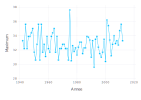

In [9]:
plot(M, x=:Annee, y=:Maximum, Geom.point, Geom.line)